In [1]:
#for pandas
import pandas as pd

In [2]:
#for numpy
import numpy as np

In [3]:
#for plotting
import matplotlib.pyplot as plt

In [4]:
#for loading .,at extension files into program
import scipy.io as sci

In [5]:
from scipy import linalg

In [6]:
def plotdata(x,colour='blue'):
    plt.scatter(x[:,0],x[:,1],edgecolors=colour,facecolors='none')

In [7]:
def featurenormalize(x):
    [m,n]=x.shape
    meann=(1/m)*np.sum(x,axis=0)
    stdd=np.std(x,axis=0,ddof=1)
    x=(x-meann)/stdd
    return x

In [8]:
def pca(x,k):
    [m,n]=x.shape
    covarmat=(np.transpose(x).dot(x))/m
    u,s,v=linalg.svd(covarmat)
    print(u)
    print(s)
    hey=u[:,0:k]
    z=x.dot(hey)
    return z,hey,s

In [9]:
def hun_by_hun(x,flat,inter):
    fig,ax=plt.subplots(10,10,sharex=True,sharey=True,figsize=((8,8)))
    i=0
    for j in range(0,10):
        for p in range(0,10):
            hey=x[i,:]
            i+=1
            ax[j,p].imshow(np.transpose(hey.reshape((flat,flat))),cmap='gray',interpolation=inter)
            ax[j,p].axis('off')
            plt.subplots_adjust(hspace=0,wspace=0)
            ax[j,p].grid('off')

In [10]:
#location of file ex7data1.mat
datafileloc1="C:/Users/Ritik/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 8/machine-learning-ex7/ex7/ex7data1"

In [11]:
data=sci.loadmat(datafileloc1)

In [12]:
for i in data:
    print(i)

__header__
__version__
__globals__
X


In [13]:
x=np.array(data["X"])

In [14]:
[mtrain,ntrain]=x.shape
print([mtrain,ntrain])

[50, 2]


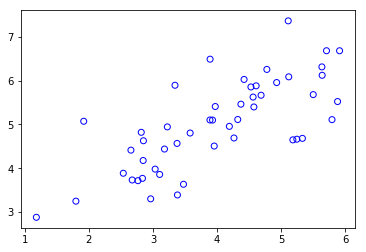

In [15]:
plotdata(x)


In [16]:
x=featurenormalize(x)

In [17]:
k=1

In [18]:
z,u,s=pca(x,k)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.70081977 0.25918023]


In [19]:
print(z.shape)
print(z[0])

(50, 1)
[1.48127391]


In [20]:
xrecover=z.dot(np.transpose(u))
print(xrecover.shape)
print(xrecover[0,:])

(50, 2)
[-1.04741883 -1.04741883]


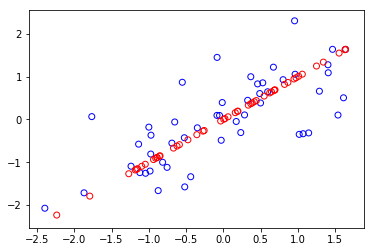

In [21]:
plotdata(x)
plotdata(xrecover,'r')

In [22]:
datafilelocfaces="C:/Users/Ritik/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 8/machine-learning-ex7/ex7/ex7faces.mat"

In [23]:
dataf=sci.loadmat(datafilelocfaces)

In [24]:
dataf.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [25]:
xfaces=np.array(dataf["X"])
print(xfaces.shape)

(5000, 1024)


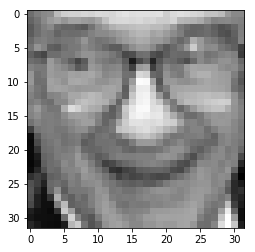

In [26]:
plt.imshow(np.transpose(xfaces[0,:].reshape((32,32))),cmap='gray')

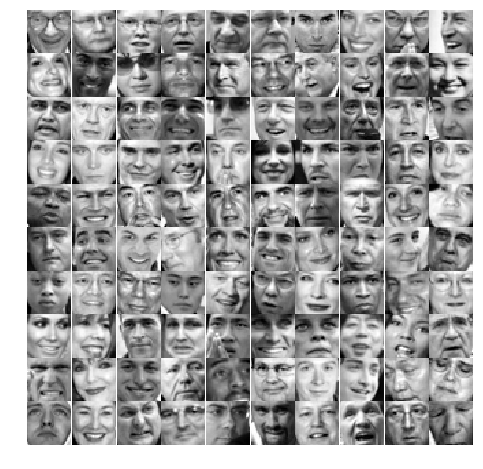

In [27]:
hun_by_hun(xfaces[0:100,:],32,None)

In [28]:
xfaces=featurenormalize(xfaces)

In [29]:
k=100

In [30]:
zfaces,ufaces,sfaces=pca(xfaces,k)

[[-0.01425307 -0.03606596 -0.04561884 ...  0.00521903  0.00091143
   0.00077515]
 [-0.01474233 -0.03809858 -0.04756249 ... -0.01142763 -0.00228691
  -0.00434598]
 [-0.01501482 -0.03988747 -0.05082085 ...  0.01843345  0.00554132
   0.00873415]
 ...
 [-0.00895052  0.03119618 -0.05691806 ...  0.0011493   0.00452914
  -0.01218846]
 [-0.00769526  0.0290752  -0.05579144 ... -0.00103011 -0.00647834
   0.00752741]
 [-0.00692969  0.02725819 -0.05339471 ...  0.00266801  0.00543461
  -0.00218828]]
[3.36957617e+02 1.30912609e+02 5.46825930e+01 ... 2.36011191e-04
 2.16380954e-04 1.99377929e-04]


In [31]:
print(zfaces.shape)

(5000, 100)


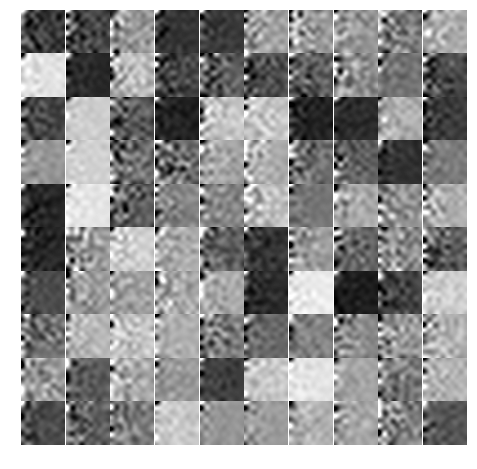

In [32]:
hun_by_hun(zfaces[0:100,:],10,'lanczos')

In [33]:
xfacesrecover=zfaces.dot(np.transpose(ufaces))

In [34]:
print(xfacesrecover.shape)

(5000, 1024)


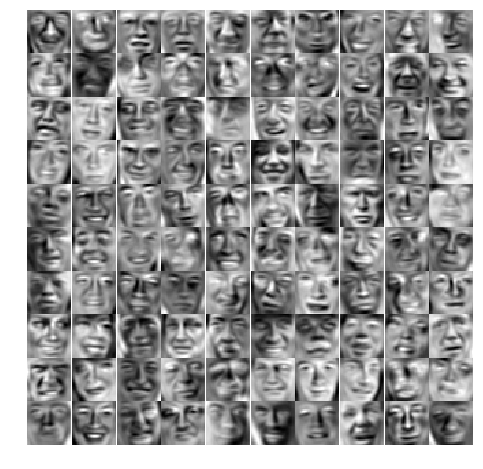

In [35]:
hun_by_hun(xfacesrecover[0:100,:],32,None)